In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project: Titanic - Machine Learning from Disaster

In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('./data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')
train_df.columns
test_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

**Note:**
- `SibSP` # of siblings / spouses aboard the Titanic
- `Parch` # of parents / children aboarb the Titanic
- `Ticket` ticket number
- `Cabin` cabin number

In [4]:
#preview data
train_df
test_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


**PassengerId**  
The first column is the passenger ID. The ID for the passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df.set_index method
```Python
train_df.set_index(train_df.PassengerId, inplace=True)
train_df.drop('PassengerId', axis=1, inplace=True)
```

## Feature Classification: Categorical vs Numerical

In [5]:
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non

In [6]:
train_df['Survived'] = train_df['Survived'].astype('category')
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for feature in features:
    train_df[feature] = train_df[feature].astype('category')
    test_df[feature] = test_df[feature].astype('category')

train_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### Distribution of Numerical and Caterical feature values across the samples

In [7]:
train_df.describe()
train_df.describe(include=['category'])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## Exploratory Data Analysis - EDA
**Correlating categorical features**
- Categorical: `Survivel` `Sex` `Embarked` `Pclass` `SibSp` `Parch`  
  
**Target Variable: `Survived`**

In [8]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


### Sex

,Sex
male,0.647587
female,0.352413


<AxesSubplot: xlabel='Sex', ylabel='count'>

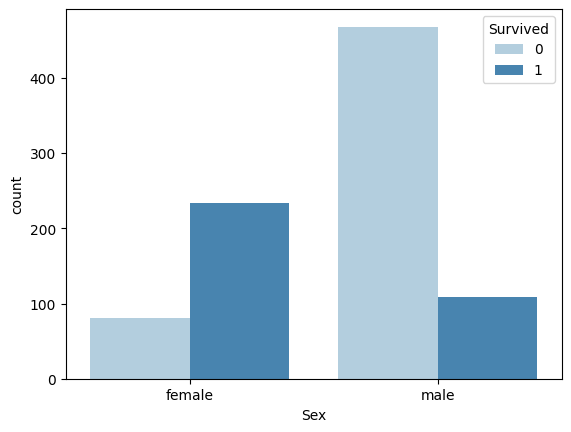

In [9]:
train_df['Sex'].value_counts(normalize=True).to_frame()
sns.countplot(data=train_df, x='Sex', hue='Survived',palette='Blues')

### Remaining categorical columns

<AxesSubplot: xlabel='Sex', ylabel='count'>

Text(0.5, 1.0, '(1) Survival Rate vs Sex')

<AxesSubplot: xlabel='Embarked', ylabel='count'>

Text(0.5, 1.0, '(2) Survival Rate vs Embarked')

<AxesSubplot: xlabel='Pclass', ylabel='count'>

Text(0.5, 1.0, '(3) Survival Rate vs Pclass')

<AxesSubplot: xlabel='SibSp', ylabel='count'>

Text(0.5, 1.0, '(4) Survival Rate vs SibSp')

<AxesSubplot: xlabel='Parch', ylabel='count'>

Text(0.5, 1.0, '(5) Survival Rate vs Parch')

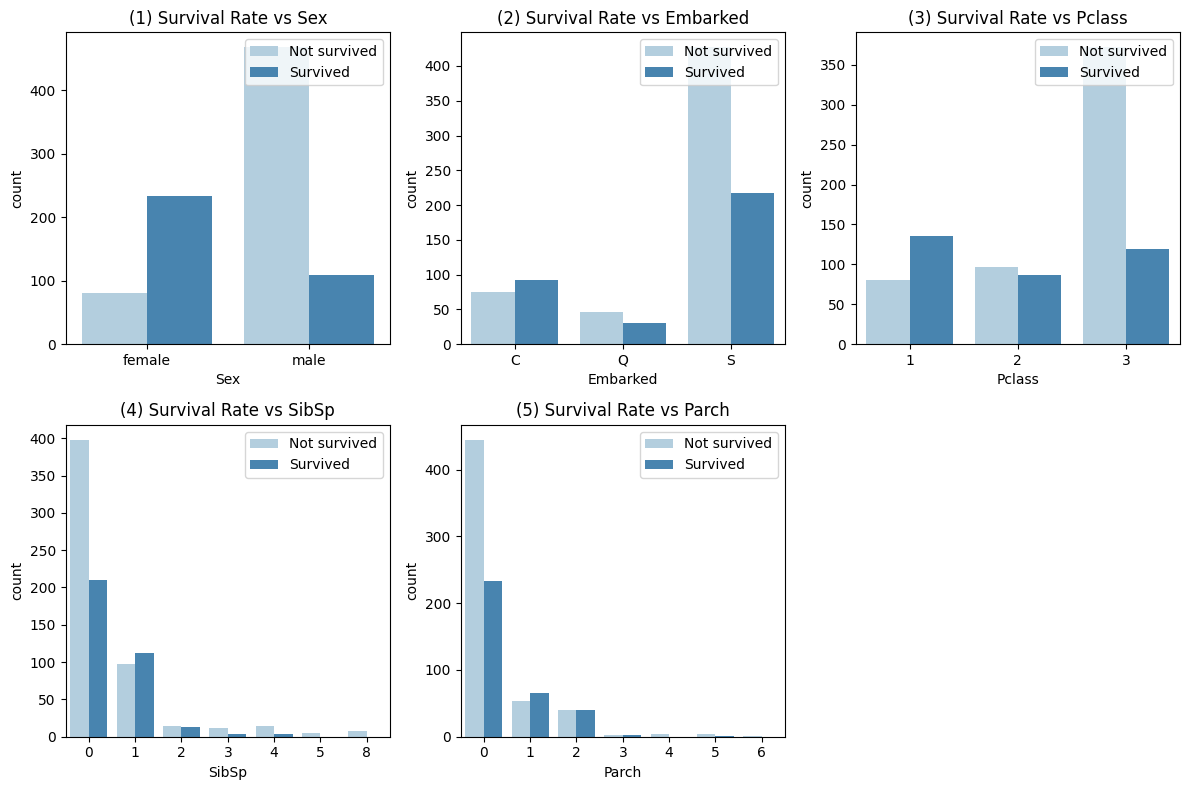

In [10]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c #index to loop through list 'cols'
        if i < len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette='Blues', ax = ax_i);
            ax_i.set_title(f'({i+1}) Survival Rate vs {cols[i]}');
            ax_i.legend(title='', loc='upper right', labels=['Not survived','Survived']);
ax.flat[-1].set_visible(False); #remove the last sublot
plt.tight_layout();
plt.show()

#### Observation - Quan sát
- Fig 1: female survival rate > male
- Fig 2: most people embarket on S (Southampton), and also had the highest people not survived
- Fig 3: 1st class higher survival rate
- Fig 4 and 5: People going with 0 are mostly not survived, 1-2 has a better chance of survived

### Numerical columns

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age', ylabel='Count'>

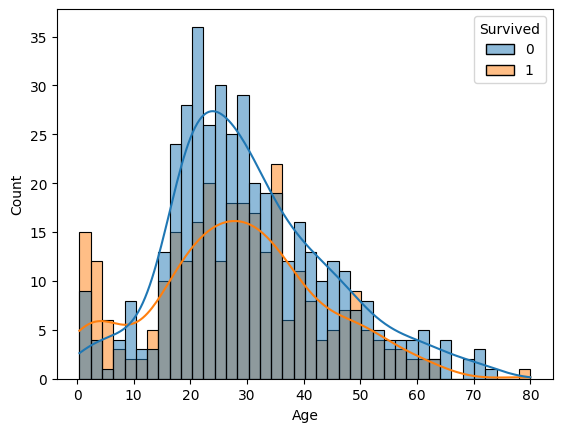

In [11]:
train_df['Age'].describe()
sns.histplot(data=train_df,x='Age',hue='Survived',bins=40,kde=True)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot: xlabel='Fare', ylabel='Count'>

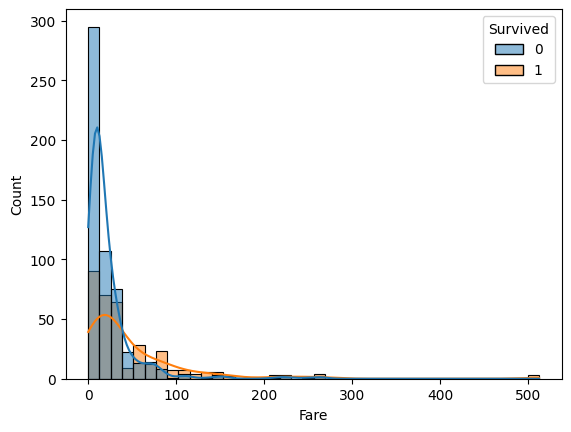

In [12]:
train_df['Fare'].describe()
sns.histplot(data=train_df,x='Fare',hue='Survived',bins=40,kde=True)

Thủ thuật phân tích dữ liệu với dữ liệu tập trung về 1 phía

<AxesSubplot: xlabel='Fare', ylabel='count'>

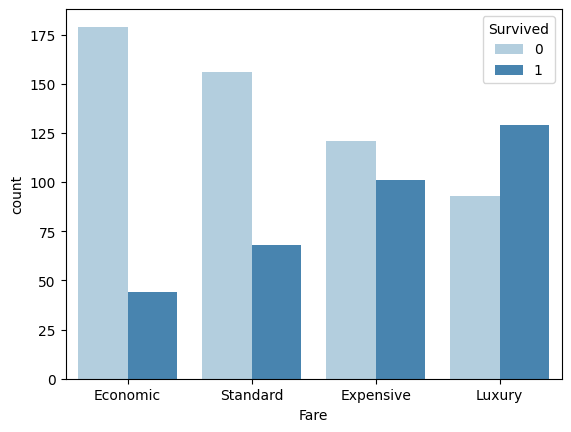

In [13]:
labels=['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'],4,labels=labels)

sns.countplot(x=quartile_data,hue=train_df['Survived'], palette='Blues')

## Feature Engineering & Data Wrangling
### Feature Engineering

In [14]:
import re
def extract_title(name):
    p = re.compile(r',([\w\s]+)\.')
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Mr        240
Miss       78
Mrs        72
Master     21
Others      7
Name: Title, dtype: int64

<AxesSubplot: xlabel='Title', ylabel='count'>

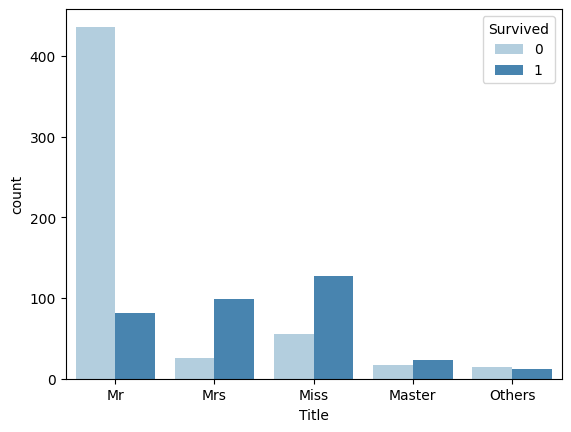

In [15]:
def group_title(title):
    if title in ['Mr','Mrs','Miss','Master']:
        return title
    elif title == 'Ms ':
        return 'Miss'
    else:
        return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))   
test_df['Title'].value_counts()

sns.countplot(data=train_df,x='Title', hue='Survived', palette='Blues')

**Family**: `SibSp` `Parch`

In [16]:
train_df['Family_Size']  = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size']  = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1
test_df['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int32

PassengerId
892      Solo
893     Small
894      Solo
895      Solo
896     Small
        ...  
1305     Solo
1306     Solo
1307     Solo
1308     Solo
1309    Small
Name: Family_Cat, Length: 418, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

<AxesSubplot: xlabel='Family_Cat', ylabel='count'>

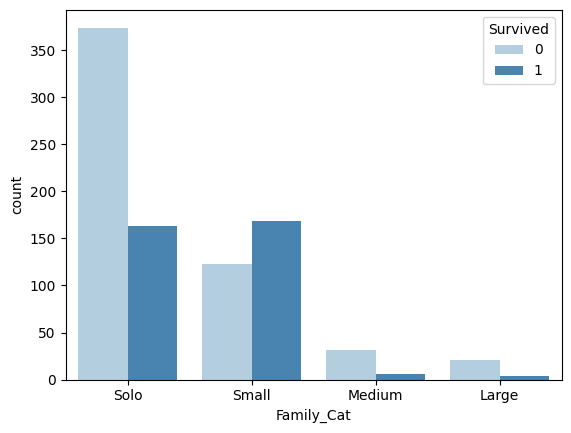

In [17]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels =['Solo', 'Small','Medium','Large'])
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels =['Solo', 'Small','Medium','Large'])
test_df['Family_Cat']
sns.countplot(data=train_df,x='Family_Cat',hue='Survived',palette='Blues')

### Data wrangling

In [18]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [19]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'{col} has {missing_count*100/n_rows:.2f}% missing values')

display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age has 19.87% missing values
Embarked has 0.22% missing values
Age has 20.57% missing values
Fare has 0.24% missing values


#### Filling missing values

In [20]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']
age_by_sex_pclass

C:\Users\admin\AppData\Local\Temp\ipykernel_3096\515710277.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [21]:
train_df['Age']=train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age']=test_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\admin\AppData\Local\Temp\ipykernel_3096\2757194996.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train_df['Age']=train_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
C:\Users\admin\AppData\Local\Temp\ipykernel_3096\2757194996.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(

In [22]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Embarked has 0.22% missing values
Fare has 0.24% missing values


In [23]:
X = train_df[feature_cols]
y = train_df['Survived']
X_test = test_df[feature_cols]

In [24]:
#preprocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [25]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [26]:
#run 1 time
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

## Model Training

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [28]:
X_train.shape, X_val.shape
X_test.shape

((712, 19), (179, 19))

(418, 19)

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

log_reg.score(X_val, y_val)

LogisticRegression(max_iter=1000, solver='liblinear')

0.8100558659217877

In [30]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
y_pred = log_reg.predict(X_val)
precision_score(y_val, y_pred), recall_score(y_val, y_pred)


(0.7413793103448276, 0.6935483870967742)

In [31]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       117
           1       0.74      0.69      0.72        62

    accuracy                           0.81       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

log_reg.fit(poly_features_X_train, y_train)
log_reg.score(poly_features_X_val, y_val)

LogisticRegression(max_iter=1000, solver='liblinear')

0.8044692737430168

In [33]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree.fit(X_train, y_train)
dtree.score(X_val, y_val)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

0.7988826815642458

In [34]:
#Cross-Validation
from sklearn.model_selection import cross_val_score

log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
dtree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=5)
lr_score = cross_val_score(log_reg_cv,X,y,scoring='accuracy',cv=5)
dt_score = cross_val_score(dtree_cv,X,y,scoring='accuracy',cv=5)

In [35]:
lr_score.mean(), lr_score.std()
dt_score.mean(), dt_score.std()

(0.826031008725127, 0.020466357172416235)

(0.8193333751804657, 0.01682578617225806)

### Baseline Model Comparison

In [40]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
seed = 2023

models = [
    LinearSVC(random_state=seed),
    SVC(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver='liblinear', max_iter=12000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier()
]

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-package

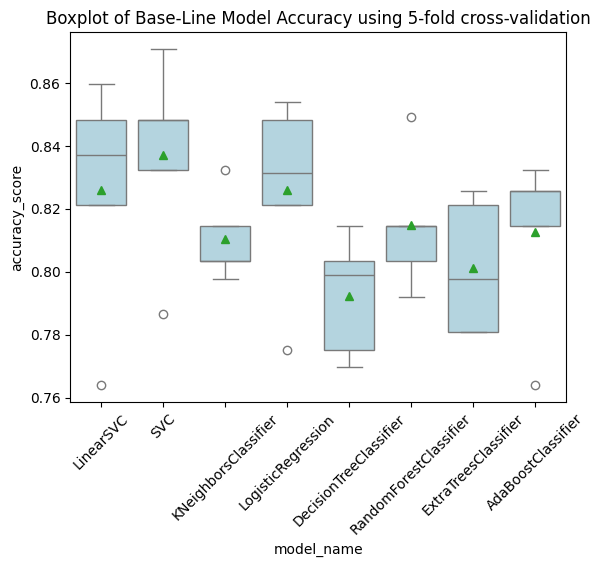

,Mean,Standard Deviation
model_name,,
SVC,0.837267,0.031492
LinearSVC,0.826044,0.037442
LogisticRegression,0.826044,0.031238
RandomForestClassifier,0.814776,0.021361
AdaBoostClassifier,0.812548,0.027859
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.801324,0.021474
DecisionTreeClassifier,0.792361,0.019141


In [46]:
from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models,X,y,metrics, cv=5,plot_results=False):
    #define k-fold
    kfold = StratifiedKFold(cv, shuffle=True,random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model,X,y,scoring=metrics, cv=kfold)
        for fold_id, score in enumerate(scores):
            entries.append((model_name,fold_id,score))
    cv_df = pd.DataFrame(entries, columns=['model_name','fold_id','accuracy_score'])
    
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean,std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean','Standard Deviation']
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    if plot_results:
        sns.boxplot(x='model_name',y='accuracy_score',data=cv_df,color='lightblue', showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation=45)
        plt.show()
    return baseline_results
    
generate_baseline_results(models, X,y,metrics='accuracy',cv=5,plot_results=True)
    